# Model

In [18]:
import pandas as pd

df = pd.read_csv('cleaned_combined_2015_2020.csv')

# display df.columns in a dataframe
cols = df.columns
# display max rows
pd.set_option('display.max_rows', None)
# display col width to 100
pd.set_option('display.max_colwidth', 100)
cols_df = pd.DataFrame({'Variable_Names': cols})
cols_df

,Variable_Names
0,student_totals_seniors
1,specific_interactions_1-on-1s_total
2,specific_interactions_group_total
3,specific_interactions_1-on-1s_at_least_one
4,specific_interactions_group_at_least_one
5,specific_interactions_parent_meetings
6,specific_interactions_parent_meetings_at_least_one
7,total_interactions_met_with_1_plus_times_(group_and_1_1)
8,total_interactions_met_with_3_plus_times_(group_and_1_1)
9,total_interactions_met_with_5_plus_times_(group_and_1_1)


# VIF: Variance Inflation Factor

- Question: How much multicollinearity would be in the model?
- VIF is a measure of multicollinearity among the independent variables within a multiple regression. 
- It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variance of a single beta if it were fit alone.

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


Convert non-numeric columns to numeric if possible, or exclude them
df = df.select_dtypes(include=[np.number])

Add a constant to the dataframe for the intercept
df = sm.add_constant(df)

# Calculate VIF
vif = pd.DataFrame()
vif["variables"] = df.columns
vif["VIF"] = [round(variance_inflation_factor(df.values, i),3) for i in range(df.shape[1])]

vif

/Volumes/External SSD NVMe PCIe 1TB 1/Data Science/Academic/UVA_MSDS/Capstone/capstone_venv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/Volumes/External SSD NVMe PCIe 1TB 1/Data Science/Academic/UVA_MSDS/Capstone/capstone_venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,student_totals_seniors,721.210
1,specific_interactions_1-on-1s_total,1013.168
2,specific_interactions_group_total,2103.895
3,specific_interactions_1-on-1s_at_least_one,295.675
4,specific_interactions_group_at_least_one,488.927
5,specific_interactions_parent_meetings,503.562
6,specific_interactions_parent_meetings_at_least_one,374.291
7,total_interactions_met_with_1_plus_times_(group_and_1_1),1047.069
8,total_interactions_met_with_3_plus_times_(group_and_1_1),1063.264
9,total_interactions_met_with_5_plus_times_(group_and_1_1),1026.135


In [1]:
# first attempt to iterate through subsets of 5 variables to see if any combination of 5 variables has low multicollinearity
# # maybe subsets of 5 variables will perform better, let mine them all and see if anything works in the multicollinearity sense
# from itertools import combinations
# import statsmodels.api as sm

# df = pd.read_csv('cleaned_combined_2015_2020.csv')

# df = pd.get_dummies(df, columns=['school_name', 'year_starting'])

# school_name_cols = [col for col in df.columns if col.startswith('school_name')]
# year_starting_cols = [col for col in df.columns if col.startswith('year_starting')]
 
# df = df[[col for col in df.columns if col.endswith('_rate')]]

# # drop school_name
# df = df.drop(columns=['enrolled_rate'])

# combos = set(list(combinations(df.columns, 2)))

# combos = [list(combination) + school_name_cols + year_starting_cols for combination in combos]

# print(len(combos))

# results = []
# for combination in combos:
#     X = df[list(combination)]
#     y = df['enrolled_rate']
#     X = sm.add_constant(X)
#     model = sm.OLS(y, X).fit()
#     results.append({'combination': combination, 'vif': [round(variance_inflation_factor(X.values, i),3) for i in range(X.shape[1])], 'rsquared': model.rsquared, 'rsquared_adj': model.rsquared_adj, 'aic': model.aic, 'bic': model.bic})
#     results_df = pd.DataFrame(results)
    
# results_df

That is some multi-collinearity! All features are highly correlated with each other. This is a significant problem for a simple linear model. 

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the data
df = pd.read_csv('cleaned_combined_2015_2020.csv')

# interest variable set by the question
variable_of_primary_interest = 'specific_interactions_1-on-1s_total_rate'

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['school_name', 'year_starting'])

# Separate the variable to exclude response variable defining
y = df['enrolled_rate']

# Drop the variable the response from the predictors
x = df.drop(['enrolled_rate', variable_of_primary_interest], axis=1)

# Standardize the predictors
X_scaled = StandardScaler().fit_transform(x)

# Apply PCA to the predictors
adj_r_squared = []
effect_coefficients = []
effect_pvals = []
mses = []
other_effect_coefficients = []
constants = []


for i in range(1):
    pca = PCA(n_components=1)
    X_pca = pca.fit_transform(X_scaled)

    # combnine the PCA components with te excluded variable
    X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
    X_pca[variable_of_primary_interest] = df[variable_of_primary_interest]

    # pval
    x2 = sm.add_constant(X_pca)
    est = sm.OLS(y, x2)
    est2 = est.fit()
    # show all of the summary
    print(est2.summary())
        
    # counselor effect coefficient
    effect_coefficients.append(est2.params[variable_of_primary_interest])
    effect_pvals.append(est2.pvalues[variable_of_primary_interest])

    # adjusted r-squared from est2
    # print(est2.rsquared_adj)
    adj_r_squared.append(est2.rsquared_adj)

    # add up all of the coefficients that are not the variable of primary interest, no constant
    other_effect_coefficients.append(est2.params.drop(variable_of_primary_interest).drop('const').sum())

    # constant
    constants.append(est2.params['const'])

    # mse from est2
    mses.append(est2.mse_resid)

pd.DataFrame({'adj_r_squared': adj_r_squared,
              'mse': mses,
              'counselor_effect_coefficients': effect_coefficients,
              'effect_pvals': effect_pvals,
              'other_effect_coefficients': other_effect_coefficients,
              'intercept': est2.params['const']})

                            OLS Regression Results                            
Dep. Variable:          enrolled_rate   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     4.436
Date:                Wed, 21 Feb 2024   Prob (F-statistic):             0.0136
Time:                        21:00:08   Log-Likelihood:                 130.05
No. Observations:                 138   AIC:                            -254.1
Df Residuals:                     135   BIC:                            -245.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

,adj_r_squared,mse,counselor_effect_coefficients,effect_pvals,other_effect_coefficients,intercept
0,0.047767,0.009089,-0.011101,0.00405,-0.002847,0.631799


Kaiser's rule is a heuristic used in factor analysis, including Principal Component Analysis (PCA), to decide how many components to retain. The rule suggests that only components with eigenvalues greater than 1 should be retained.

The rationale behind Kaiser's rule is that any individual principal component should explain more variance than any single original variable. In PCA, the eigenvalue of a component is equal to the variance explained by that component. 

In standard PCA where the data has been standardized (mean of 0 and standard deviation of 1), each original variable explains exactly 1 unit of variance. Therefore, if a principal component has an eigenvalue less than 1, it is explaining less variance than a single variable from the original dataset, and thus, may not be adding much value.

However, it's important to note that Kaiser's rule is a rule of thumb and may not always be the best approach. It can sometimes overestimate or underestimate the number of components. Other methods, such as looking at the scree plot or considering the cumulative explained variance, can also be useful in deciding the number of components to retain.

# Selection of Principal Components

In [15]:
#Kaiser's Rule
eigenvalues = pca.explained_variance_
ideal_components_kaiser = len(eigenvalues[eigenvalues > 1])
print("Ideal number of components (Kaiser's Rule):", ideal_components_kaiser)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
ideal_components = np.where(cumulative_variance > 0.95)[0][0] + 1  # 95% variance
print('Ideal number of components (95% variance):', ideal_components)

# Cumulative explained variance
# Scree plot
plt.plot(np.arange(1, len(pca.explained_variance_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axvline(x=ideal_components_kaiser, color='r', linestyle='--')
plt.axvline(x=ideal_components, color='g', linestyle='--')
plt.axhline(y=0.95, color='k', linestyle='--')
plt.show()

Ideal number of components (Kaiser's Rule): 1


IndexError: index 0 is out of bounds for axis 0 with size 0

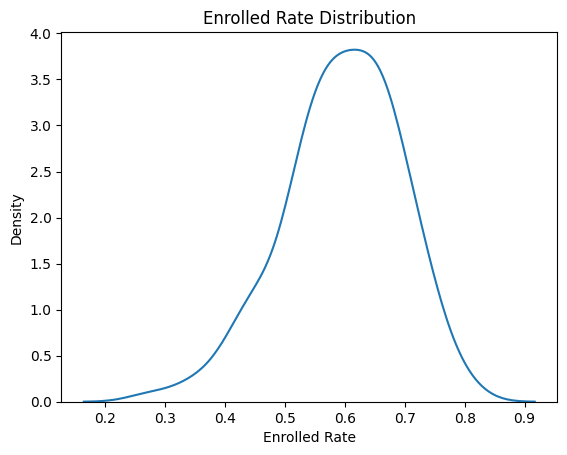

In [16]:
sns.kdeplot(df['enrolled_rate']) 
plt.xlabel('Enrolled Rate') 
plt.ylabel('Density') 
plt.title('Enrolled Rate Distribution') 
plt.show()

In [7]:
# create a variable for the enrolled rate third
enrolled_rate_bottom_third = df['enrolled_rate'].quantile(0.33)
enrolled_rate_middle_third = df['enrolled_rate'].quantile(0.66)

# cut the enrolled rate into three categories
df['enrolled_rate_category'] = pd.cut(df['enrolled_rate'], [0, enrolled_rate_bottom_third, enrolled_rate_middle_third, 1], labels=['bottom_third', 'middle_third', 'top_third'])

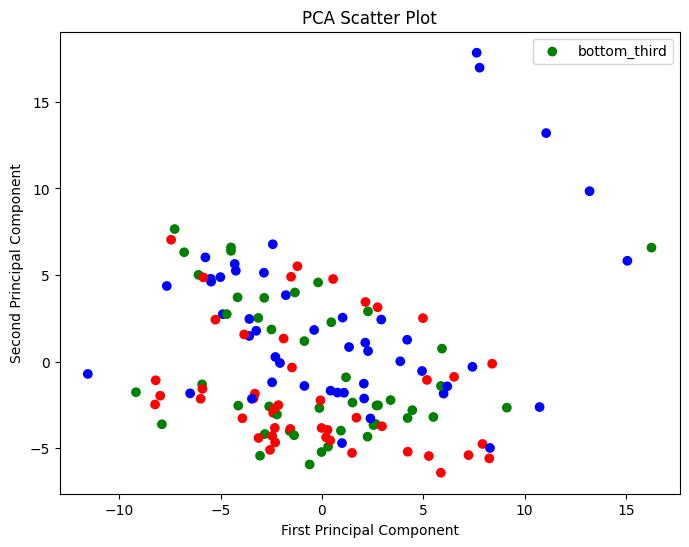

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

color_dict = {'bottom_third': 'red', 'middle_third': 'green', 'top_third': 'blue'}

# Apply PCA
pca = PCA(n_components=32)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['enrolled_rate_category'].map(color_dict))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(loc='upper
plt.title('PCA Scatter Plot')
plt.show()

1. https://towardsdatascience.com/principal-component-regression-clearly-explained-and-implemented-608471530a2f#3b4c 
2. https://www.youtube.com/watch?v=-5nnciZ9hgc
3. https://bookdown.org/ssjackson300/Machine-Learning-Lecture-Notes/pcr.html